<a href="https://colab.research.google.com/github/Dharani220/Stockprediction_LSTM/blob/main/NetFlix_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Preparation and Cleaning**

Data Cleaning is an important step and time-consuming step in data analysis. Formatting issues (e.g., rows and columns merged), missing data, duplicated rows, spelling mistakes, and so on could all be present. These challenges could make data analysis complex. Here we will address some of those.

The import numpy portion of the code tells Python to bring the NumPy library into your current environment.The as np portion of the code then tells python to give numpy the alias of np

pandas is a popular Python-based data analysis toolkit which can be imported using import pandas as pd . It presents a diverse range of utilities, ranging from parsing multiple file formats to converting an entire data table into a NumPy matrix array

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


To access data from the CSV file, we require a function read_csv() that retrieves data in the form of the Dataframe.

pd.read_csv(filepath, sep=’ ,’ , header=’infer’, index_col=None, usecols=None, engine=None, skiprows=None, nrows=None)

In [ ]:
netflix_df = pd.read_csv('/content/drive/MyDrive/EDA on IMDB/NFLX.csv')
netflix_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


Let’s see the shape of the data by using the shape method.

In [ ]:
netflix_df.shape

(1009, 7)

This means that this dataset has 1009 rows and 7 columns.

To print the first five rows we will use the head() function.

In [ ]:
netflix_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Now,we will see that what are columns present in the dataframe by using column method


In [ ]:
netflix_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

To print the last five rows we will use the tail() function

In [ ]:
netflix_df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


To print some sample rows we will use the sample() function

In [ ]:
netflix_df.sample(15)

,Date,Open,High,Low,Close,Adj Close,Volume
917,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
794,2021-04-01,529.929993,540.500000,527.030029,539.419983,539.419983,3938600
428,2019-10-17,304.489990,308.750000,288.299988,293.350006,293.350006,38258900
295,2019-04-09,360.540009,366.739990,359.000000,364.709991,364.709991,5439200
488,2020-01-14,344.399994,345.380005,335.519989,338.690002,338.690002,7199400
490,2020-01-16,343.500000,343.559998,335.850006,338.619995,338.619995,5016000
898,2021-08-30,557.250000,567.159973,556.450012,566.179993,566.179993,2434800
686,2020-10-26,487.029999,496.820007,478.899994,488.239990,488.239990,6186100
29,2018-03-19,315.799988,317.000000,307.339996,313.480011,313.480011,9925200
74,2018-05-22,334.049988,336.630005,331.149994,331.619995,331.619995,5964400


The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


Let us start by looking at descriptive statistic parameters for the dataset. We will use describe() for this.

In [ ]:
netflix_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
netflix_df.describe(include='object')

,Date
count,1009
unique,1009
top,2018-02-05
freq,1


Delete the duplicates in a Dataset by using duplicate()

In [ ]:
netflix_df=netflix_df.drop_duplicates(keep='first')


In [ ]:
netflix_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


**Missing values**

In [ ]:
netflix_df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
netflix_df.shape

(1009, 7)

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 63.1+ KB


As of now, the features are not having missing values. Let's see it after couple of steps again.

The features low should be numeric. So convert the type of respective features to numeric.

In [ ]:
netflix_df['Low'] = pd.to_numeric(netflix_df['Low'], errors='coerce', downcast="integer")

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 63.1+ KB


In [ ]:
netflix_df['Date']= pd.to_numeric(netflix_df['Date'], errors='coerce', downcast="integer")

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       0 non-null      float64
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 63.1 KB


We will now check for missing values in our dataset. In case there are any missing entries, we will impute them with appropriate values.We will use the isnull() function for this purpose.

In [ ]:
netflix_df.isnull().sum()

Date         1009
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
dtype: int64

Oooh! Now the features "date" having missing values as 'NaN'. Clean the NaN values by imputing 0 inplace of 'NaN' using replace()

In [ ]:
netflix_df['Date']=netflix_df['Date'].replace(np.nan,0)

In [ ]:
netflix_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
netflix_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009.0,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,0.0,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,0.0,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,0.0,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,0.0,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,0.0,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,0.0,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,0.0,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


**Exploratory Analysis and Visualization**

> In EDA, visualization is very important. Raw text or numbers can not speak much but figures definitely gives more insights about data.





In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
netflix_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,0.0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,0.0,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,0.0,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,0.0,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,0.0,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,0.0,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,0.0,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,0.0,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,0.0,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


**Univariate Analysis**

> This type of data consists of only one variable. The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes. It does not deal with causes or relationships and the main purpose of the analysis is to describe the data and find patterns that exist within it.The example of a univariate data can be region.


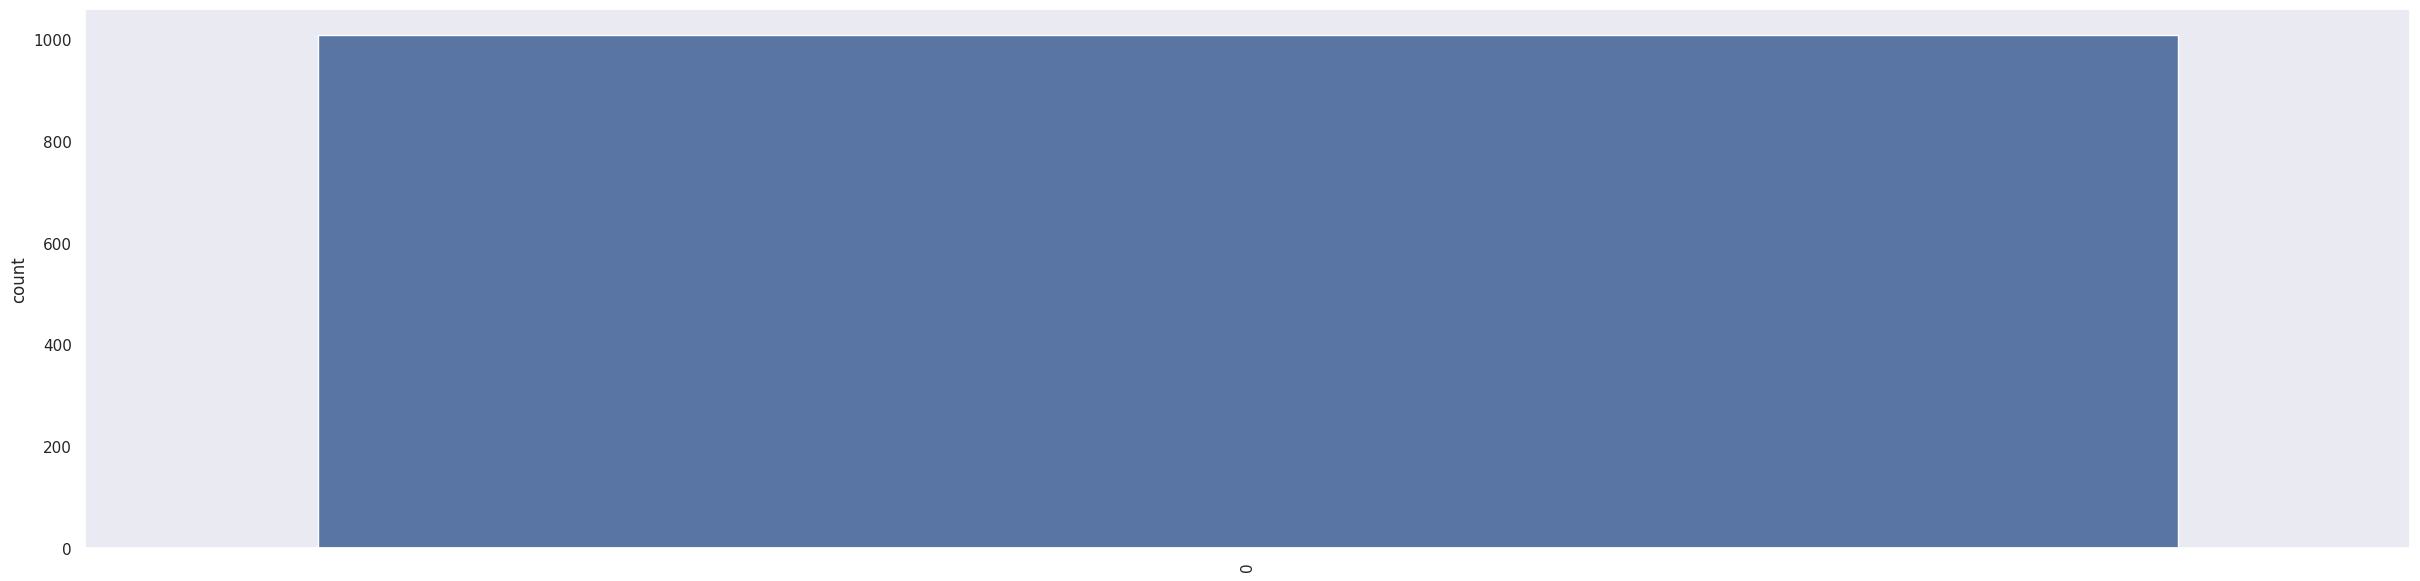

In [ ]:
plt.figure(figsize=(30,7))
sns.set(style='dark')
sns.countplot(netflix_df['Open'].sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

(array([   0,    1,    2, ..., 1002, 1003, 1004]),
 [Text(0, 0, '1144000'),
  Text(1, 0, '1287200'),
  Text(2, 0, '1367800'),
  Text(3, 0, '1595500'),
  Text(4, 0, '1621100'),
  Text(5, 0, '1625100'),
  Text(6, 0, '1673900'),
  Text(7, 0, '1685700'),
  Text(8, 0, '1736000'),
  Text(9, 0, '1780700'),
  Text(10, 0, '1832000'),
  Text(11, 0, '1867300'),
  Text(12, 0, '1876300'),
  Text(13, 0, '1882800'),
  Text(14, 0, '1906600'),
  Text(15, 0, '1919400'),
  Text(16, 0, '1960500'),
  Text(17, 0, '1975500'),
  Text(18, 0, '1995900'),
  Text(19, 0, '2012900'),
  Text(20, 0, '2019300'),
  Text(21, 0, '2032800'),
  Text(22, 0, '2039400'),
  Text(23, 0, '2061500'),
  Text(24, 0, '2065600'),
  Text(25, 0, '2069600'),
  Text(26, 0, '2077400'),
  Text(27, 0, '2096600'),
  Text(28, 0, '2109500'),
  Text(29, 0, '2126200'),
  Text(30, 0, '2151300'),
  Text(31, 0, '2176300'),
  Text(32, 0, '2197100'),
  Text(33, 0, '2220300'),
  Text(34, 0, '2250900'),
  Text(35, 0, '2254500'),
  Text(36, 0, '2254700'

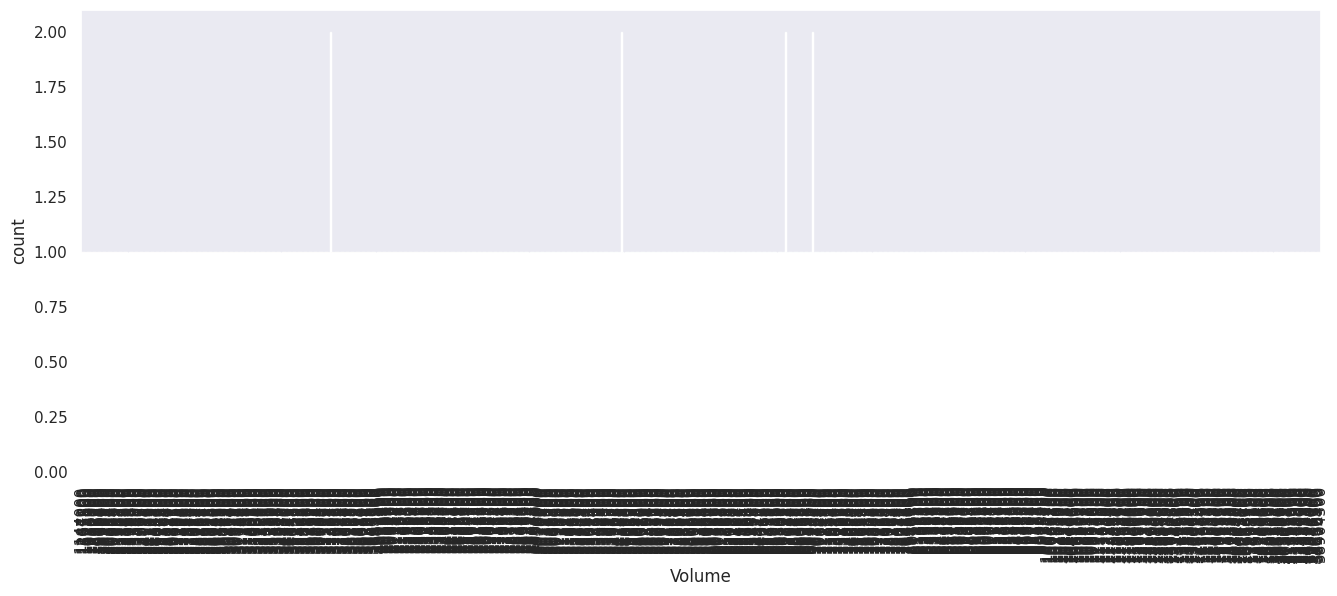

In [ ]:
plt.figure(figsize=(16, 6))
plot = sns.countplot(x='Volume', data=netflix_df);
plt.xticks(rotation = 90)

<Axes: xlabel='Low', ylabel='Count'>

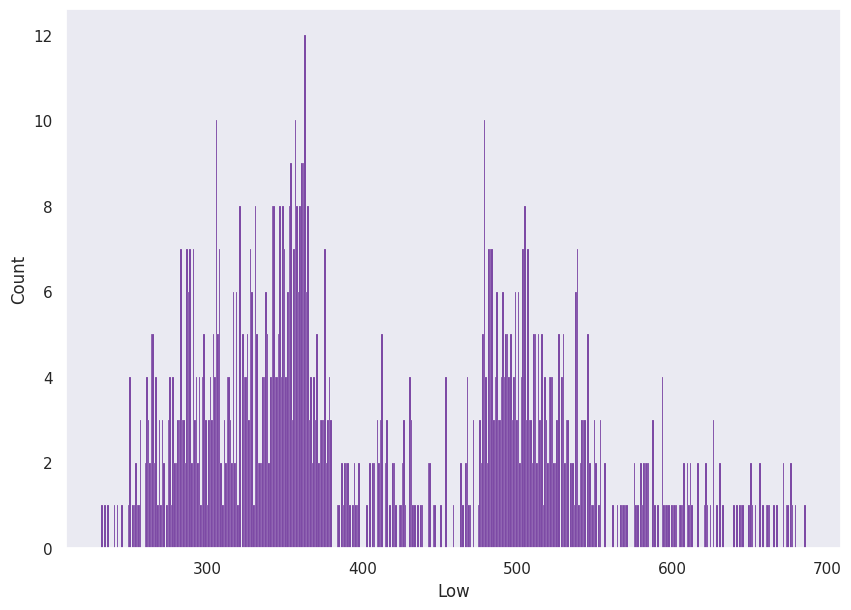

In [ ]:
plt.figure(figsize=(10,7))
sns.set(style='dark')
sns.histplot(data=netflix_df,x='Low',color='indigo',binwidth=1)

**Bivariate / Multivariate Analysis**`



This type of data involves two different variables. The analysis of this type of data deals with causes and relationships and the analysis is done to find out the relationship among the two variables.Example of bivariate data can be profit and state


In [ ]:
correlations = netflix_df.corr()

In [ ]:
correlations

,Date,Open,High,Low,Close,Adj Close,Volume
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,NaN,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,NaN,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,NaN,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,NaN,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,NaN,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,NaN,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


<Axes: >

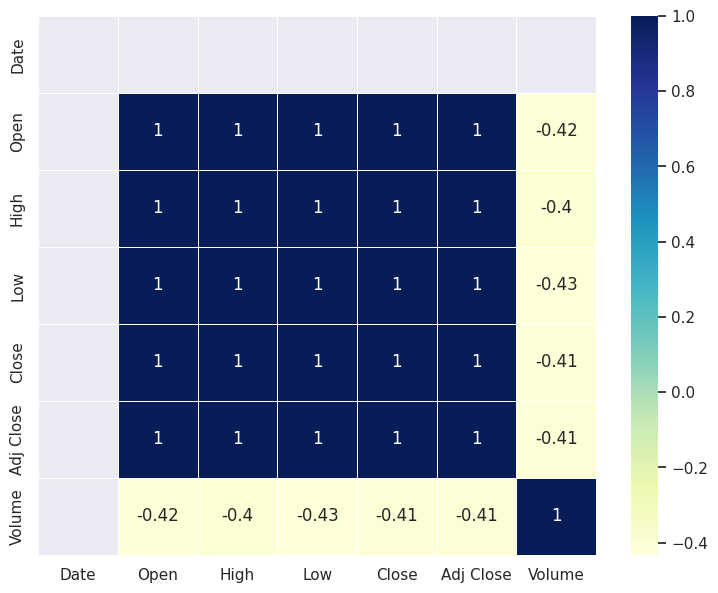

In [ ]:
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

In [ ]:
a= netflix_df.nlargest(10, 'Close')
a

,Date,Open,High,Low,Close,Adj Close,Volume
954,0.0,690.000000,700.989990,686.090027,691.690002,691.690002,2732800
941,0.0,673.059998,690.969971,671.239990,690.309998,690.309998,3817500
944,0.0,677.270020,689.390015,677.270020,688.289978,688.289978,2334900
953,0.0,678.270020,688.359985,676.900024,687.400024,687.400024,2077400
951,0.0,660.010010,683.340027,653.820007,682.609985,682.609985,4192700
955,0.0,691.609985,691.739990,679.739990,682.020020,682.020020,2012900
942,0.0,689.059998,689.969971,676.539978,681.169983,681.169983,3110900
952,0.0,681.239990,685.260010,671.489990,679.330017,679.330017,2872200
956,0.0,692.349976,694.159973,675.000000,678.799988,678.799988,2613700
943,0.0,683.109985,687.679993,673.820007,677.719971,677.719971,3888600


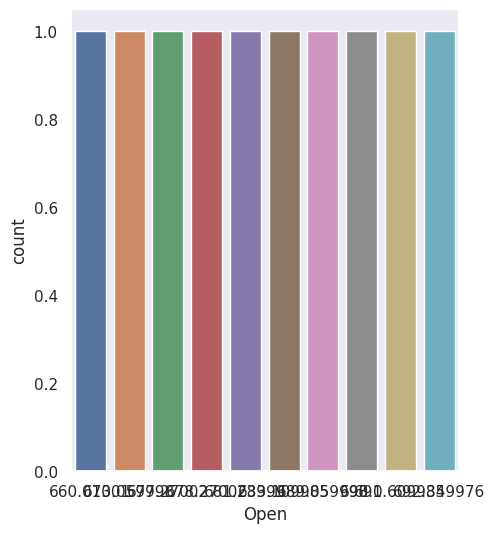

In [ ]:
plt.figure(figsize=(5, 6))
plot = sns.countplot(x='Open', data=a)